In [5]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import rasterio
from rasterio.warp import transform_geom, calculate_default_transform
from shapely.geometry import Point, Polygon


In [6]:
path = "../Data/coral_watch_ala/data.xlsx"
df = pd.read_excel(path, sheet_name="CoralWatch Random Survey")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
gdf['Observation date'] = pd.to_datetime(gdf['Observation date'])
gdf['Site Name'].unique()
gdf_2015 = gdf[gdf['Observation date'] >'2014-12-31']

In [8]:
print(gdf_2015.crs)

None


In [9]:
top_left_y, top_left_x = -14.4626,145.1453
btm_right_y, btm_right_x = -15.4558,146.1558
bbox = box(top_left_x, top_left_y, btm_right_x, btm_right_y)

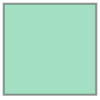

In [10]:
bbox

In [11]:
subset_gdf_2015 = gdf_2015.cx[bbox.bounds[0]: bbox.bounds[2], bbox.bounds[1]: bbox.bounds[3]]
subset_gdf_2015 = subset_gdf_2015.set_crs('EPSG:4326')

In [12]:
tiff_path = "/media/ziad/Expansion/Clipped_Reefs_By_Image/T55LCD_20170721T003709no_transform/6847_T55LCD_20170721T003709no_transform.tiff"
with rasterio.open(tiff_path) as src:
    # transform the given longitude and latitude to the coordinate system of the raster
    dst_crs = src.crs


In [13]:
subset_gdf_2015.to_crs(src.crs)

,Project ID,Project Activity ID,Activity ID,Start date,End date,Description,Status,Attribution,Verification status,Latitude,...,Coral No.,Colour Code Lightest,Colour Code Darkest,Average.,Coral Type,Species,Photo,The count of unique values for colour code average.,The count of unique values for type of coral.,geometry
180,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,507af00d-e257-4401-a89f-059d02589de7,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.970278,...,1,E3,E4,3.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (360449.533 8344553.102)
181,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,507af00d-e257-4401-a89f-059d02589de7,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.970278,...,2,D3,D4,3.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (360449.533 8344553.102)
182,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,507af00d-e257-4401-a89f-059d02589de7,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.970278,...,3,D4,D5,4.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (360449.533 8344553.102)
183,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,507af00d-e257-4401-a89f-059d02589de7,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.970278,...,4,D2,D4,3.0,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (360449.533 8344553.102)
184,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,507af00d-e257-4401-a89f-059d02589de7,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.970278,...,5,D2,D4,3.0,Boulder corals,NaN,NaN,"CustomChartDataItem|||3|||3,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (360449.533 8344553.102)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89259,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,60f2bdff-56a3-49c0-914a-0e93df1e35c8,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.664400,...,13,D3,D4,3.5,Boulder corals,NaN,NaN,"CustomChartDataItem|||4|||2,CustomChartDataIte...","CustomChartDataItem|||Plate corals|||6,CustomC...",POINT (355986.024 8378366.753)
89260,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,60f2bdff-56a3-49c0-914a-0e93df1e35c8,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.664400,...,14,C3,C4,3.5,Plate corals,NaN,NaN,"CustomChartDataItem|||4|||2,CustomChartDataIte...","CustomChartDataItem|||Plate corals|||6,CustomC...",POINT (355986.024 8378366.753)
89261,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,60f2bdff-56a3-49c0-914a-0e93df1e35c8,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,NaN,-14.664400,...,15,C5,C6,5.5,Plate corals,NaN,NaN,"CustomChartDataItem|||4|||2,CustomChartDataIte...","CustomChartDataItem|||Plate corals|||6,CustomC...",POINT (355986.024 8378366.753)
89262,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,60f2bdff-56a3-49c0-914a-0e93df1e35c8,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary .

In [14]:
# get the bounds of the raster
raster_bounds = src.bounds
# create a shapely polygon object from the bounding box
polygon = Polygon([(raster_bounds.left, raster_bounds.bottom), 
                    (raster_bounds.right, raster_bounds.bottom), 
                    (raster_bounds.right, raster_bounds.top), 
                    (raster_bounds.left, raster_bounds.top)])
# check if the point is within the bounds of the raster
#is_within_bounds = pnt_.within(polygon)

In [15]:
unique_locations = subset_gdf_2015.groupby(['Longitude', 'Latitude']).first().reset_index()


In [16]:
unique_locations = unique_locations.set_crs('EPSG:4326')
unique_locations = unique_locations.to_crs(src.crs)

In [17]:

def get_raster_values(raster_file, pnt):
    values = {}
    with rasterio.open(raster_file) as src:
        # transform the given longitude and latitude to the coordinate system of the raster
        dst_crs = src.crs
        bounds = src.bounds
        polygon = Polygon([(bounds.left, bounds.bottom), 
                            (bounds.right, bounds.bottom), 
                            (bounds.right, bounds.top), 
                            (bounds.left, bounds.top)])
        is_within_bounds = pnt.within(polygon)
        # check if the transformed coordinates are within the bounds of the raster file
        if not is_within_bounds:
            return None
        # read the pixel values from each band
        print("Operation succesful")
        lon, lat = pnt.x, pnt.y
        for band_num in range(1, src.count+1):
            row, col = src.index(lon, lat)
            band_data = src.read(band_num, window=((row, row+1), (col, col+1)))
            values[f'band_{band_num}'] = band_data[0][0]
    return values

In [18]:
import os
import glob

# specify the directory path
dir_path = '/media/ziad/Expansion/Cleaned_Data_Directory'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*6880*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [19]:
unique_locations.head()

,Longitude,Latitude,Project ID,Project Activity ID,Activity ID,Start date,End date,Description,Status,Attribution,...,Coral No.,Colour Code Lightest,Colour Code Darkest,Average.,Coral Type,Species,Photo,The count of unique values for colour code average.,The count of unique values for type of coral.,geometry
0,145.280899,-15.167600,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,91bdc083-34ea-40ed-a6ad-bbb27e0e626b,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,D4,D2,3.0,Boulder corals,None,None,"CustomChartDataItem|||2|||5,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (315304.463 8322411.447)
1,145.415298,-15.415416,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,bdd29a75-5c89-4de0-acc8-431a1c02dbcc,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,B3,B3,3.0,Boulder corals,None,None,"CustomChartDataItem|||2|||1,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||10,Cust...",POINT (329947.319 8295101.081)
2,145.416702,-15.404000,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,06ae88a7-a491-47b1-b877-4ba79c6596aa,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,C1,C5,3.0,Boulder corals,None,None,"CustomChartDataItem|||1|||1,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||16,Cust...",POINT (330088.736 8296365.312)
3,145.416702,-15.048440,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,ad102034-8884-4828-8bc0-cf694596bc05,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,B3,B5,4.0,Boulder corals,None,None,"CustomChartDataItem|||1|||1,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||18,Cust...",POINT (329803.151 8335705.647)
4,145.418106,-15.416373,9c55416c-f56a-4917-a65e-da1d64a851f7,6355f9da-ac48-4e23-bb09-e4fdaf3e446f,b559de1a-4ae3-4385-9de4-8d9d71684caf,2001-12-31,NaN,Select corals randomly.\nSwim in an imaginary ...,active,CoralWatch. (2023) CoralWatch Random Survey da...,...,1,B2,B2,2.0,Boulder corals,None,None,"CustomChartDataItem|||2|||2,CustomChartDataIte...","CustomChartDataItem|||Boulder corals|||7,Custo...",POINT (330249.486 8294997.408)


In [20]:
fname_dict = {}
for file in dir_list:
    for pnt, id in zip(unique_locations.geometry, unique_locations['Site Name']):
        spectral_sig = get_raster_values(file, pnt)
        if spectral_sig is None:
            continue
        if id in fname_dict.keys():
            fname_dict[id].append({file:spectral_sig})
        else:
            fname_dict[id] = [{file:[spectral_sig]}]


Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful
Operation succesful


In [21]:
for keys in fname_dict.keys():
    print(keys)

Lizard Island, Horseshoe Reef, Great Barrier Reef (QLD), Australia
Palfrey Reef, Great Barrier Reef (QLD), Australia
Lizard Island, Palfrey Island, South Flat, Great Barrier Reef (QLD), Australia
Lizard Island, Loomis Reef, Great Barrier Reef (QLD), Australia
Lizard Island, Great Barrier Reef (QLD), Australia
Lizard Island, Watsons Bay, Great Barrier Reef (QLD), Australia
Lizard Island, Mermaid Cove, Great Barrier Reef (QLD), Australia
Lizard Island, Seabird Islet, Great Barrier Reef (QLD), Australia


In [22]:
(fname_dict["Lizard Island, Horseshoe Reef, Great Barrier Reef (QLD), Australia"])

[{'/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160711T003712no_transform.tiff': [{'band_1': 1670,
    'band_2': 1602,
    'band_3': 1199,
    'band_4': 361,
    'band_5': 276,
    'band_6': 231,
    'band_7': 222,
    'band_8': 164,
    'band_9': 52,
    'band_10': 5,
    'band_11': 91,
    'band_12': 67,
    'band_13': 184}]},
 {'/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160721T004002no_transform.tiff': {'band_1': 1534,
   'band_2': 1453,
   'band_3': 1092,
   'band_4': 312,
   'band_5': 245,
   'band_6': 200,
   'band_7': 188,
   'band_8': 152,
   'band_9': 46,
   'band_10': 7,
   'band_11': 75,
   'band_12': 61,
   'band_13': 161}},
 {'/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160820T003712no_transform.tiff': {'band_1': 1675,
   'band_2': 1669,
   'band_3': 1209,
   'band_4': 403,
   'band_5': 327,
   'band_6': 299,
   'band_7': 287,
   'band_8': 254,
   'band_9': 86,
   'band_10': 23,
   'band_11': 169,
   'band_12': 121,
   'band_13

In [23]:
def dict_to_dataframe(key, data_dict):
    """
    Takes in a key and a dictionary and returns a pandas dataframe with the
    keys as the index row, headers as the column headers, and values as values.
    """
    # Create a DataFrame from the dictionary
    df = pd.DataFrame.from_dict(data_dict, orient='index').T
    
    # Set the index name to the given key
    
    # Reset the column headers
    df.columns = range(len(df.columns))
    
    return df

In [34]:
full_df = pd.DataFrame()
for keys in fname_dict.keys():
    stacked_df = pd.DataFrame()
    for i in fname_dict[keys]:
        try:
            df = dict_to_dataframe(list(i.keys())[0], list(i.values())[0][0])
        except:
            df = dict_to_dataframe(list(i.keys())[0], list(i.values())[0])
        df['fname'] = list(i.keys())[0]
        stacked_df = pd.concat([stacked_df, df])
    stacked_df['Site Name'] = keys
    full_df = pd.concat([full_df, stacked_df])

In [35]:
full_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,fname,Site Name
0,1670,1602,1199,361,276,231,222,164,52,5,91,67,184,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R..."
0,1534,1453,1092,312,245,200,188,152,46,7,75,61,161,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R..."
0,1675,1669,1209,403,327,299,287,254,86,23,169,121,254,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R..."
0,1694,1615,1301,463,373,337,331,277,62,5,193,138,283,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R..."
0,1521,1526,1240,441,350,309,321,276,53,5,197,145,285,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1806,2046,2206,2465,2368,2890,3231,3470,281,12,2740,1445,3614,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re..."
0,1757,2008,2115,2420,2245,2903,3167,3515,303,8,2708,1641,3509,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re..."
0,2804,3169,3570,3332,3220,3985,4533,4537,1214,1011,3327,2219,4842,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re..."
0,2767,3260,3610,3413,3101,3933,4462,4679,1310,1072,3143,2241,4894,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re..."


In [36]:
for name in stacked_df.fname:
    print(name)
    break

/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160711T003712no_transform.tiff


In [37]:
full_df['date_col'] = full_df['fname'].str.extract(r'_(\d{8})', expand=False)

In [38]:
full_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,fname,Site Name,date_col
0,1670,1602,1199,361,276,231,222,164,52,5,91,67,184,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R...",20160711
0,1534,1453,1092,312,245,200,188,152,46,7,75,61,161,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R...",20160721
0,1675,1669,1209,403,327,299,287,254,86,23,169,121,254,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R...",20160820
0,1694,1615,1301,463,373,337,331,277,62,5,193,138,283,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R...",20160909
0,1521,1526,1240,441,350,309,321,276,53,5,197,145,285,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R...",20170308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1806,2046,2206,2465,2368,2890,3231,3470,281,12,2740,1445,3614,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re...",20210720
0,1757,2008,2115,2420,2245,2903,3167,3515,303,8,2708,1641,3509,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re...",20210730
0,2804,3169,3570,3332,3220,3985,4533,4537,1214,1011,3327,2219,4842,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re...",20220307
0,2767,3260,3610,3413,3101,3933,4462,4679,1310,1072,3143,2241,4894,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re...",20220406


In [39]:
full_df['date_col'] = pd.to_datetime(full_df['date_col'], format='%Y%m%d')

In [30]:
full_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,fname,Site Name,date_col
0,1670,1602,1199,361,276,231,222,164,52,5,91,67,184,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R...",2016-07-11
0,1534,1453,1092,312,245,200,188,152,46,7,75,61,161,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R...",2016-07-21
0,1675,1669,1209,403,327,299,287,254,86,23,169,121,254,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R...",2016-08-20
0,1694,1615,1301,463,373,337,331,277,62,5,193,138,283,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R...",2016-09-09
0,1521,1526,1240,441,350,309,321,276,53,5,197,145,285,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R...",2017-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1806,2046,2206,2465,2368,2890,3231,3470,281,12,2740,1445,3614,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re...",2021-07-20
0,1757,2008,2115,2420,2245,2903,3167,3515,303,8,2708,1641,3509,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re...",2021-07-30
0,2804,3169,3570,3332,3220,3985,4533,4537,1214,1011,3327,2219,4842,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re...",2022-03-07
0,2767,3260,3610,3413,3101,3933,4462,4679,1310,1072,3143,2241,4894,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re...",2022-04-06


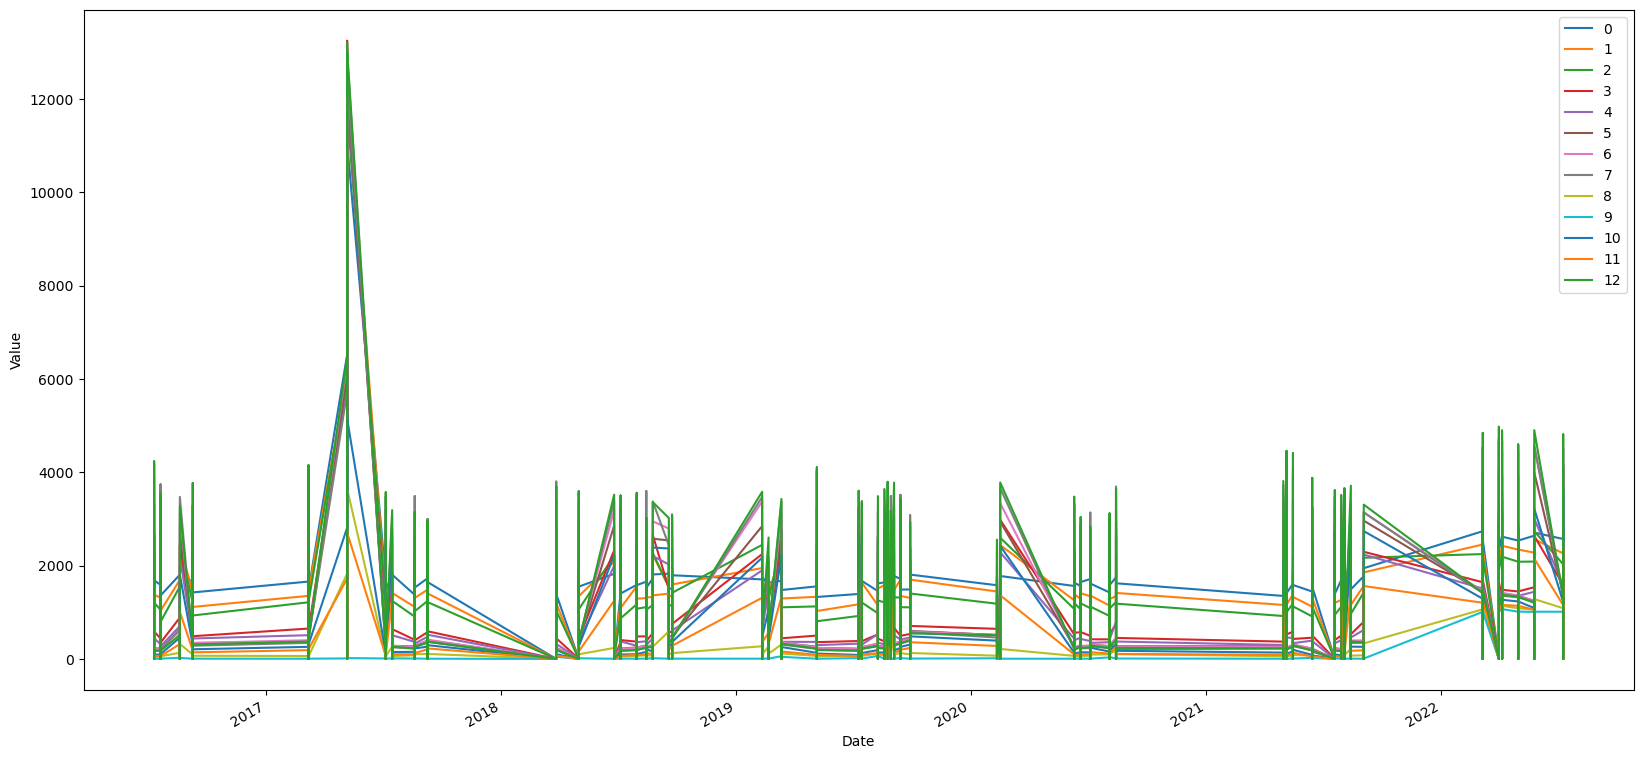

In [31]:
import matplotlib.pyplot as plt

full_df_copy = full_df.copy()
full_df.set_index('date_col', inplace=True)
full_df.plot(kind = 'line', figsize=(20,10))
# Set the x label to 'Date'
plt.xlabel('Date')

# Set the y label to 'Value'
plt.ylabel('Value')

# Show the plot
plt.show()

In [32]:

# Set the index of the dataframe to the date column

stacked_df.set_index('date_col', inplace=True)

# Create a line plot of the dataframe
stacked_df.plot(kind='line')

# Set the x label to 'Date'
plt.xlabel('Date')

# Set the y label to 'Value'
plt.ylabel('Value')

# Show the plot
plt.show()

KeyError: "None of ['date_col'] are in the columns"

In [40]:
full_df_copy = full_df.copy()
band_data = full_df_copy.select_dtypes(include=['uint16'])

In [ ]:
horse_shoe = subset_gdf_2015[subset_gdf_2015['Site Name'] == "Lizard Island, Palfrey Island, South Flat, Great Barrier Reef (QLD), Australia"]

In [ ]:
# horse_shoe[]

In [ ]:
horse_shoe[['Observation date', 'Average.']]

,Observation date,Average.
59492,2016-03-21,3.0
59493,2016-03-21,2.5
59494,2016-03-21,3.0
59495,2016-03-21,1.5
59496,2016-03-21,2.5
...,...,...
59657,2016-03-21,3.5
59658,2016-03-21,3.5
59659,2016-03-21,2.5
59660,2016-03-21,2.5


In [ ]:
horse_shoe['Observation date'].unique()

array(['2016-03-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
full_df_copy

,0,1,2,3,4,5,6,7,8,9,10,11,12,fname,Site Name
date_col,,,,,,,,,,,,,,,
2016-07-11,1670,1602,1199,361,276,231,222,164,52,5,91,67,184,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R..."
2016-07-21,1534,1453,1092,312,245,200,188,152,46,7,75,61,161,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R..."
2016-08-20,1675,1669,1209,403,327,299,287,254,86,23,169,121,254,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R..."
2016-09-09,1694,1615,1301,463,373,337,331,277,62,5,193,138,283,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R..."
2017-03-08,1521,1526,1240,441,350,309,321,276,53,5,197,145,285,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Horseshoe Reef, Great Barrier R..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-20,1806,2046,2206,2465,2368,2890,3231,3470,281,12,2740,1445,3614,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re..."
2021-07-30,1757,2008,2115,2420,2245,2903,3167,3515,303,8,2708,1641,3509,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re..."
2022-03-07,2804,3169,3570,3332,3220,3985,4533,4537,1214,1011,3327,2219,4842,/media/ziad/Expansion/Cleaned_Data_Directory/6...,"Lizard Island, Seabird Islet, Great Barrier Re..."


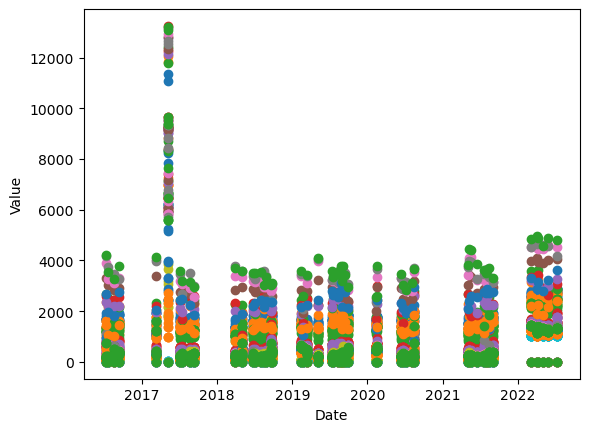

In [41]:
# Create a scatter plot of the dataframe
fig, ax = plt.subplots()
for col in band_data.columns:
    ax.scatter(full_df_copy['date_col'], band_data[col])

# Set the x label to 'Date'
ax.set_xlabel('Date')

# Set the y label to 'Value'
ax.set_ylabel('Value')

# Show the plot
plt.show()

In [ ]:
import joblib
loaded_pipeline = joblib.load('/home/ziad/Documents/Github/ShallowLearn/Models/pipeline.pkl')

In [46]:
X_train = full_df_copy.select_dtypes(include=['uint16'])

In [54]:
pred = loaded_pipeline.predict(X_train)

In [53]:
import seaborn as sns

In [ ]:
sns.plot()

In [57]:
full_df_copy['pred'] = pred

In [59]:
full_df_copy.columns

Index([          0,           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
                10,          11,          12,     'fname', 'Site Name',
        'date_col',      'pred'],
      dtype='object')

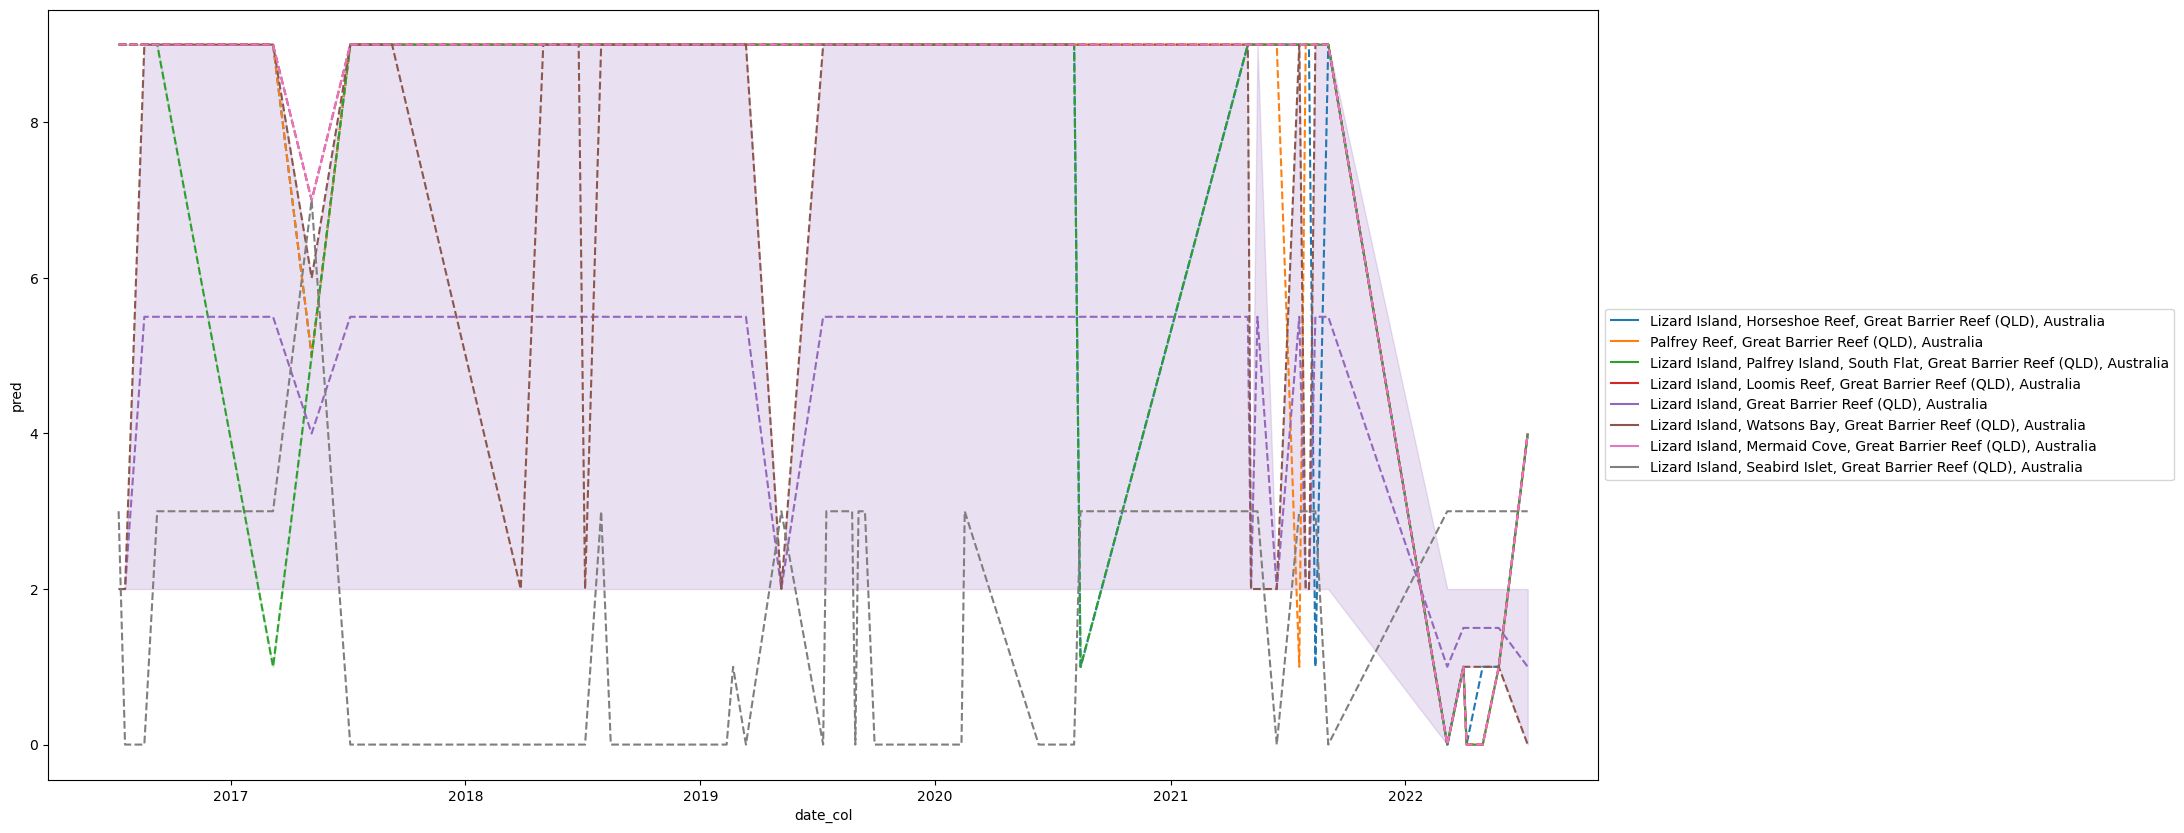

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
scatterplot = sns.lineplot(x='date_col', y='pred', hue ='Site Name', data=full_df_copy, ax = ax, legend='full', linestyle='dashed', dashes=(1, 1))
legend = scatterplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [79]:
my_area_gdf = subset_gdf_2015[['Observation date', 'Coral Type','Average.','Site Name']]

In [88]:
liz_reefs = pd.DataFrame(full_df_copy['Site Name'].unique())
liz_reefs.columns = ['Site Name']

In [89]:
merged_df = pd.merge(my_area_gdf, liz_reefs, on='Site Name', how='inner')

In [90]:
merged_df

,Observation date,Coral Type,Average.,Site Name
0,2021-07-05,Boulder corals,3.0,"Lizard Island, Great Barrier Reef (QLD), Austr..."
1,2021-07-05,Boulder corals,3.0,"Lizard Island, Great Barrier Reef (QLD), Austr..."
2,2021-07-05,Boulder corals,3.5,"Lizard Island, Great Barrier Reef (QLD), Austr..."
3,2021-07-05,Boulder corals,3.5,"Lizard Island, Great Barrier Reef (QLD), Austr..."
4,2021-07-05,Boulder corals,4.5,"Lizard Island, Great Barrier Reef (QLD), Austr..."
...,...,...,...,...
694,2016-03-21,Soft corals,2.5,"Lizard Island, Palfrey Island, South Flat, Gre..."
695,2016-03-18,Boulder corals,2.0,"Lizard Island, Loomis Reef, Great Barrier Reef..."
696,2016-03-18,Branching corals,2.5,"Lizard Island, Loomis Reef, Great Barrier Reef..."
697,2016-03-18,Branching corals,1.5,"Lizard Island, Loomis Reef, Great Barrier Reef..."


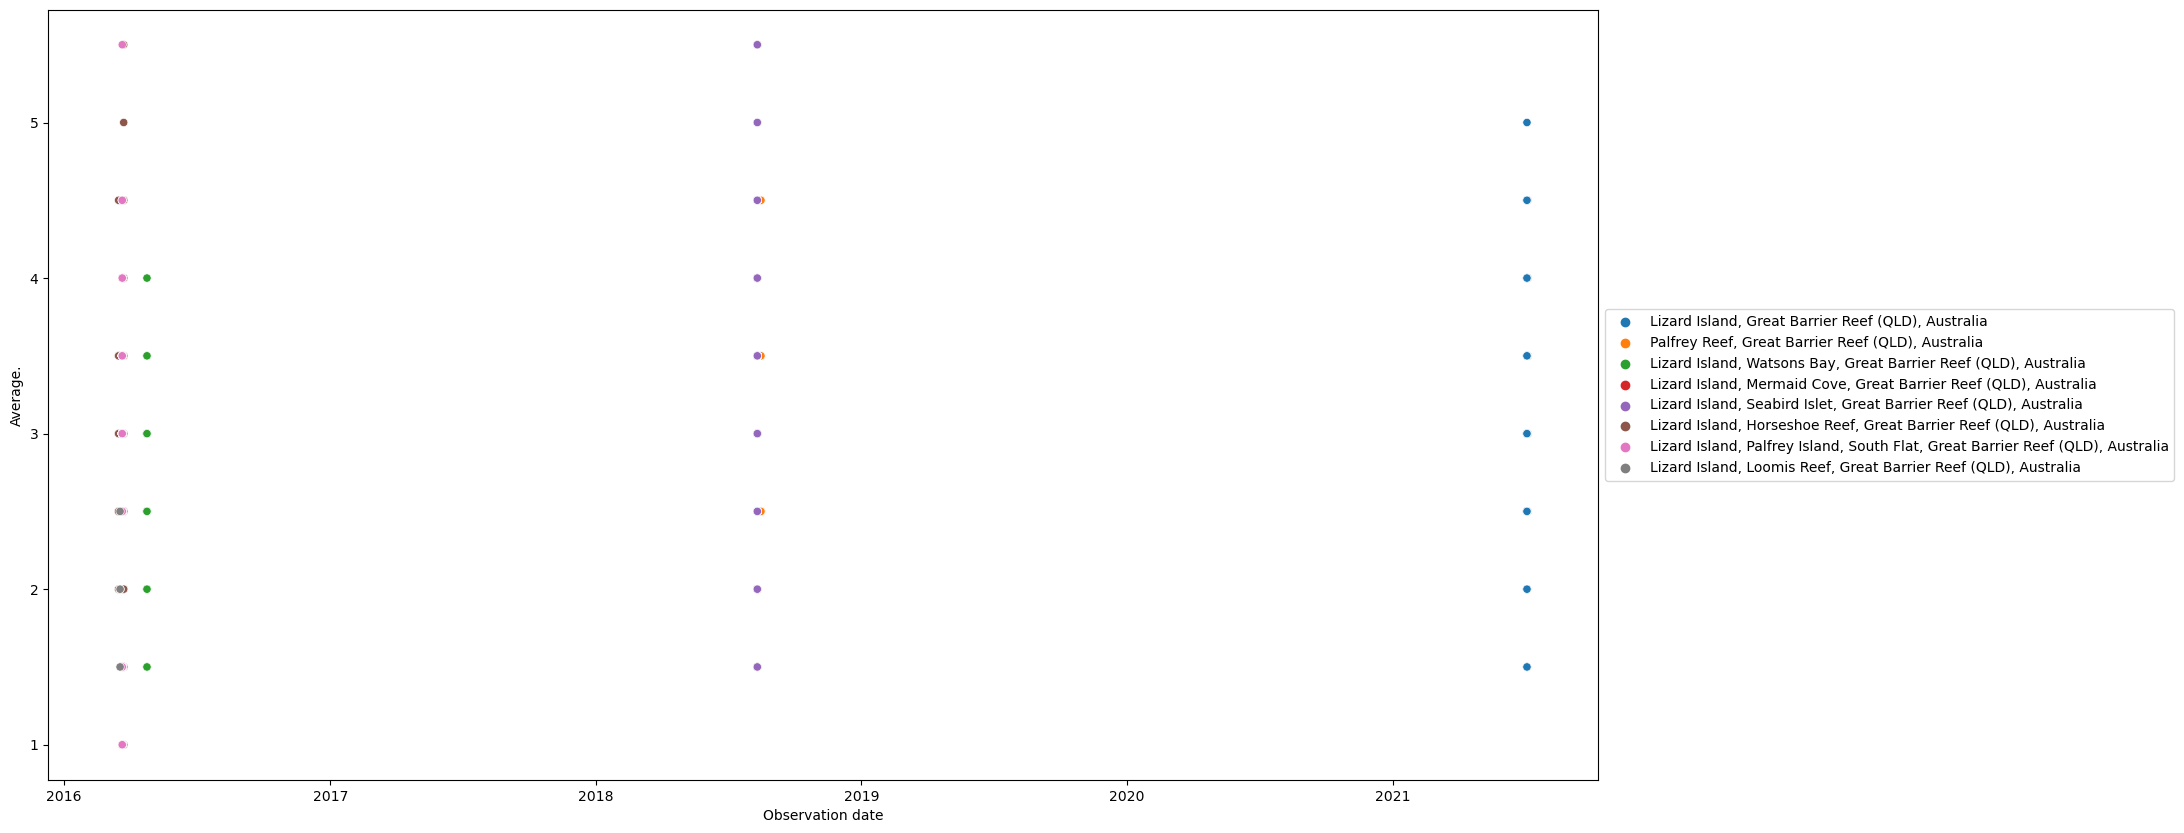

In [91]:
fig, ax = plt.subplots(figsize=(20,10))
scatterplot = sns.scatterplot(x='Observation date', y='Average.', hue ='Site Name', data=merged_df, ax = ax, legend='full')
legend = scatterplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [68]:
spectral_sig = get_raster_values(file, pnt)

In [43]:
output_test = gpd.GeoDataFrame(index=[0], crs=src.crs, geometry=[spectral_sig]) 

In [44]:
output_test.to_file("../Data/Lizard_test.shp")

In [45]:
fname_dict

{'Lizard Island, Horseshoe Reef, Great Barrier Reef (QLD), Australia': [{'/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160711T003712no_transform.tiff': [{'band_1': 1670,
     'band_2': 1602,
     'band_3': 1199,
     'band_4': 361,
     'band_5': 276,
     'band_6': 231,
     'band_7': 222,
     'band_8': 164,
     'band_9': 52,
     'band_10': 5,
     'band_11': 91,
     'band_12': 67,
     'band_13': 184}]},
  {'/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160721T004002no_transform.tiff': {'band_1': 1534,
    'band_2': 1453,
    'band_3': 1092,
    'band_4': 312,
    'band_5': 245,
    'band_6': 200,
    'band_7': 188,
    'band_8': 152,
    'band_9': 46,
    'band_10': 7,
    'band_11': 75,
    'band_12': 61,
    'band_13': 161}},
  {'/media/ziad/Expansion/Cleaned_Data_Directory/6880_T55LCD_20160820T003712no_transform.tiff': {'band_1': 1675,
    'band_2': 1669,
    'band_3': 1209,
    'band_4': 403,
    'band_5': 327,
    'band_6': 299,
    'band_7': 287,

In [46]:
for pnt, id in zip(unique_locations.geometry, unique_locations['Site Name']):
    print(pnt, id)

POINT (315304.4627402294 8322411.446601819) Lizard Island, Watsons Bay, Great Barrier Reef (QLD), Australia
POINT (329947.3186976809 8295101.081160216) Boulder Reef, D-7, Great Barrier Reef (QLD), Australia
POINT (330088.736314313 8296365.311968818) Egret Reef, 205, Great Barrier Reef (QLD), Australia
POINT (329803.1512277748 8335705.646823901) Egret Reef, 209, Great Barrier Reef (QLD), Australia
POINT (330249.4857698097 8294997.408347715) Boulder Reef, S-16, Great Barrier Reef (QLD), Australia
POINT (330280.6490671112 8295445.994569834) Boulder Reef, S-12, Great Barrier Reef (QLD), Australia
POINT (330537.7927788411 8293431.378971329) Boulder Reef, D-1, Great Barrier Reef (QLD), Australia
POINT (330559.9670208911 8296879.862259328) Boulder Reef, D-6, Great Barrier Reef (QLD), Australia
POINT (331525.6451337981 8294066.213836609) Boulder Reef, S-2, Great Barrier Reef (QLD), Australia
POINT (331558.7848704159 8296486.708629119) Egret Reef, 204, Great Barrier Reef (QLD), Australia
POINT 

In [47]:
unique_locations.dtypes

Longitude                                                     float64
Latitude                                                      float64
Project ID                                                     object
Project Activity ID                                            object
Activity ID                                                    object
Start date                                                     object
End date                                                      float64
Description                                                    object
Status                                                         object
Attribution                                                    object
Verification status                                            object
Centroid Latitude                                             float64
Centroid Longitude                                            float64
Site Name                                                      object
Site External Id    

In [48]:
unique_locations.drop('Observation date', axis = 1).to_file("../Data/Unique_Reefs.shp")

/tmp/ipykernel_36825/3108358576.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  unique_locations.drop('Observation date', axis = 1).to_file("../Data/Unique_Reefs.shp")


ValueError: Axis limits cannot be NaN or Inf

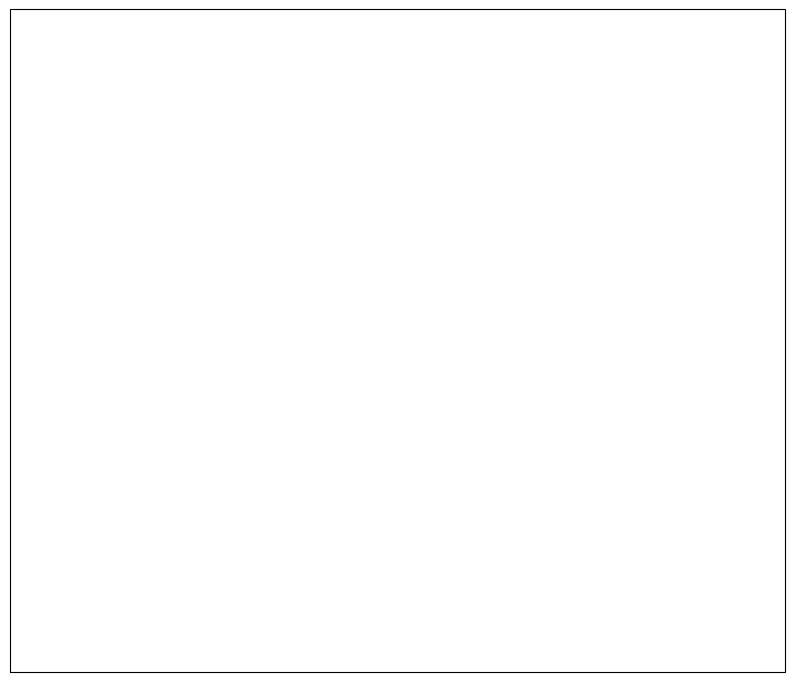

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Set up the map projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Mercator())

xmin, ymin, xmax, ymax = unique_locations.total_bounds
ax.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.PlateCarree())

# Add the bathymetric data as a background
ax.stock_img()

# Plot the GeoDataFrame on top of the bathymetry
ax.plot(gdf.geometry.x, gdf.geometry.y, 'o', markersize=5, color='red', transform=ccrs.PlateCarree())

# Add map features like coastlines and borders
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

# Show the plot
plt.show()

In [ ]:
-14.745567,145.511548

In [ ]:
y, x= -14.7385,145.5110

In [ ]:
# create a point object with coordinates (x, y)
point = Point(x, y)

In [ ]:
print(point)

POINT (145.511 -14.7385)


In [ ]:
pnt_ in src.bounds

False

In [ ]:
transform_geom('EPSG:4326', dst_crs, point)

{'type': 'Point', 'coordinates': (339712.68381670944, 8370066.7770678485)}

In [ ]:
dst_crs

CRS.from_epsg(32755)

In [ ]:
lon, lat

(339712.68381670944, 8370066.7770678485)

In [ ]:
pnt_ = Point(339729.4,8369227.1)

In [ ]:
pnt_.x

339729.4

In [ ]:
get_raster_values(tiff_path, pnt_)

{'band_1': 1934,
 'band_2': 1663,
 'band_3': 1462,
 'band_4': 1258,
 'band_5': 1315,
 'band_6': 1751,
 'band_7': 2004,
 'band_8': 1918,
 'band_9': 635,
 'band_10': 398,
 'band_11': 1442,
 'band_12': 955,
 'band_13': 2128}

In [ ]:

get_raster_values(tiff_path, x, y)

{'band_1': 2072,
 'band_2': 1850,
 'band_3': 1756,
 'band_4': 1708,
 'band_5': 1915,
 'band_6': 2471,
 'band_7': 2794,
 'band_8': 2672,
 'band_9': 755,
 'band_10': 403,
 'band_11': 2601,
 'band_12': 1541,
 'band_13': 3064}